<a href="https://colab.research.google.com/github/sanjanaapandey/DiabetesPrediction-Project-using-GANs/blob/main/Practicum1_GANs_Algos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**[BAGGING ALGORITHM]**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
file_path = "/content/diabetes (4).csv"
df = pd.read_csv(file_path)

In [ ]:
print("Dataset Preview:")
print(df.head())
print("\nDataset Info:")
print(df.info())

Dataset Preview:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1

In [ ]:
X = df.iloc[:, :-1]  #FEATURES
y = df.iloc[:, -1]   #TARGET

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)


In [ ]:
bagging_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50,
                  random_state=42)

In [ ]:
y_pred = bagging_clf.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
print(f"\nModel Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)


Model Accuracy: 0.7468

Confusion Matrix:
[[77 22]
 [17 38]]


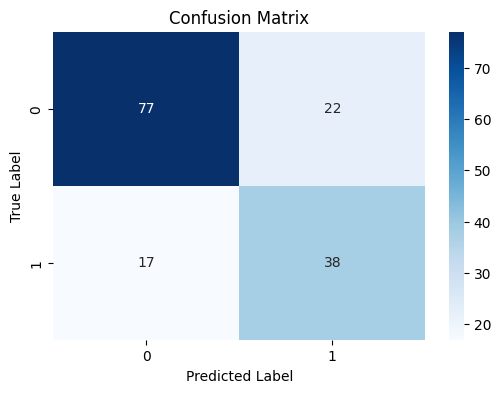

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## **SVM (Support Vector Machine)**

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset=pd.read_csv("/content/diabetes (4).csv")
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(y_pred)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0
 0 1 0 0 0 0 0]
Accuracy: 0.8020833333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       130
           1       0.74      0.60      0.66        62

    accuracy                           0.80       192
   macro avg       0.78      0.75      0.76       192
weighted avg       0.80      0.80      0.80       192

Confusion Matrix:
 [[117  13]
 [ 25  37]]


boosting algorithm

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

# Load dataset
df = pd.read_csv("/content/diabetes (4).csv")

# Split into features and target
X = df.iloc[:, :-1]  # Select all columns except the last one
y = df.iloc[:, -1]   # Select the last column

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize AdaBoost with Decision Trees
adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),  # Fixed argument name
                              n_estimators=50, learning_rate=1.0, random_state=42)

# Train model
adaboost.fit(X_train, y_train)

# Make predictions
y_pred = adaboost.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print(report)


Accuracy: 0.7792207792207793
              precision    recall  f1-score   support

           0       0.84      0.81      0.82        99
           1       0.68      0.73      0.70        55

    accuracy                           0.78       154
   macro avg       0.76      0.77      0.76       154
weighted avg       0.78      0.78      0.78       154



DECISION TREES

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data_path = "/content/diabetes (4).csv"
df = pd.read_csv(data_path)

# Display first few rows to understand the structure
display(df.head())

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Define features and target (assuming the last column is the target)
X = df.iloc[:, :-1]  # All columns except the last one
y = df.iloc[:, -1]    # Last column as target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Missing values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



GNN(Graphical Neural Ntworks)

downloading pytorch

In [ ]:
!pip install torch torchvision torchaudio
!pip install torch-geometric
!pip install torch-scatter torch-sparse torch-cluster torch-spline-conv -f https://data.pyg.org/whl/torch-2.0.0+cpu.html


Looking in links: https://data.pyg.org/whl/torch-2.0.0+cpu.html


GNN

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import kneighbors_graph

# Load the dataset
data_path = "/content/diabetes (4).csv"  # Update the path if necessary
df = pd.read_csv(data_path)

# Define features and target
X = df.iloc[:, :-1].values  # Feature matrix
y = df.iloc[:, -1].values   # Target labels

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create adjacency matrix using k-Nearest Neighbors
adj_matrix = kneighbors_graph(X, n_neighbors=5, mode='connectivity', include_self=True)
edge_index = torch.tensor(np.array(adj_matrix.nonzero()), dtype=torch.long)

# Convert data to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float)
y_tensor = torch.tensor(y, dtype=torch.long)

data = Data(x=X_tensor, edge_index=edge_index, y=y_tensor)

# Define Graph Neural Network (GNN) Model
class GNN(torch.nn.Module):
    def __init__(self, in_features, hidden_dim, out_features):
        super(GNN, self).__init__()
        self.conv1 = GCNConv(in_features, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, out_features)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Model setup
model = GNN(in_features=X.shape[1], hidden_dim=16, out_features=len(np.unique(y)))
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

# Train the model
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out, data.y)
    loss.backward()
    optimizer.step()
    return loss.item()

# Train for 200 epochs
for epoch in range(200):
    loss = train()
    if epoch % 20 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Evaluate the model
model.eval()
_, pred = model(data).max(dim=1)
accuracy = (pred == data.y).sum().item() / len(data.y)
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 0, Loss: 1.0116
Epoch 20, Loss: 0.5025
Epoch 40, Loss: 0.4703
Epoch 60, Loss: 0.4560
Epoch 80, Loss: 0.4488
Epoch 100, Loss: 0.4445
Epoch 120, Loss: 0.4415
Epoch 140, Loss: 0.4388
Epoch 160, Loss: 0.4364
Epoch 180, Loss: 0.4341
Test Accuracy: 0.7943


catboost algorithm by classification

In [ ]:
!pip install --upgrade numpy catboost



  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error

# Load dataset
file_path = "/content/diabetes (4).csv"  # Adjust the path if needed
df = pd.read_csv(file_path)

# Display first few rows
print("Dataset Sample:\n", df.head())

# Check for missing values and handle them
if df.isnull().sum().sum() > 0:
    df = df.dropna()  # Drop rows with missing values
    print("Missing values found and removed.")

# Assume the last column is the target variable (modify if needed)
target_column = df.columns[-1]

# Identify categorical columns
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Encode categorical target variable if necessary
if df[target_column].dtype == 'object':
    label_encoder = LabelEncoder()
    df[target_column] = label_encoder.fit_transform(df[target_column])

# Split features (X) and target variable (y)
X = df.drop(columns=[target_column])
y = df[target_column]

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing datasets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Choose Classification or Regression
task = input("Enter 'classification' or 'regression': ").strip().lower()

if task == "classification":
    # Initialize CatBoost Classifier
    model = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, verbose=0, cat_features=categorical_features)

    # Train the model
    model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=50, early_stopping_rounds=50)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

elif task == "regression":
    # Initialize CatBoost Regressor
    model = CatBoostRegressor(iterations=500, learning_rate=0.1, depth=6, verbose=0, cat_features=categorical_features)

    # Train the model
    model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=50, early_stopping_rounds=50)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate performance
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse:.2f}')

else:
    print("Invalid input. Please enter 'classification' or 'regression'.")
    exit()

# Feature importance visualization
plt.figure(figsize=(10, 6))
plt.barh(X.columns, model.get_feature_importance(), color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in CatBoost Model")
plt.show()


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error

# Load dataset
file_path = "/content/diabetes (4).csv"  # Adjust the path if needed
df = pd.read_csv(file_path)

# Display first few rows
print("Dataset Sample:\n", df.head())

# Check for missing values and handle them
if df.isnull().sum().sum() > 0:
    df = df.dropna()  # Drop rows with missing values
    print("Missing values found and removed.")

# Assume the last column is the target variable (modify if needed)
target_column = df.columns[-1]

# Identify categorical columns
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Encode categorical target variable if necessary
if df[target_column].dtype == 'object':
    label_encoder = LabelEncoder()
    df[target_column] = label_encoder.fit_transform(df[target_column])

# Split features (X) and target variable (y)
X = df.drop(columns=[target_column])
y = df[target_column]

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing datasets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Choose Classification or Regression
task = input("Enter 'classification' or 'regression': ").strip().lower()

if task == "classification":
    # Initialize CatBoost Classifier
    model = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, verbose=0, cat_features=categorical_features)

    # Train the model
    model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=50, early_stopping_rounds=50)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

elif task == "regression":
    # Initialize CatBoost Regressor
    model = CatBoostRegressor(iterations=500, learning_rate=0.1, depth=6, verbose=0, cat_features=categorical_features)

    # Train the model
    model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=50, early_stopping_rounds=50)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate performance
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse:.2f}')

else:
    print("Invalid input. Please enter 'classification' or 'regression'.")
    exit()

# Feature importance visualization
plt.figure(figsize=(10, 6))
plt.barh(X.columns, model.get_feature_importance(), color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in CatBoost Model")
plt.show()


catboost algorithm by regression

TabsNet Algorithm

TabsNet download

In [ ]:
!pip install pytorch-tabnet


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pytorch_tabnet.tab_model import TabNetClassifier

# Load the dataset
data_path = "/content/diabetes (4).csv"  # Update the path if necessary
df = pd.read_csv(data_path)

# Define features and target
X = df.iloc[:, :-1].values  # Feature matrix
y = df.iloc[:, -1].values   # Target labels

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Define TabNet model
clf = TabNetClassifier()

# Train the model
clf.fit(X_train=X_train, y_train=y_train, eval_set=[(X_test, y_test)], eval_name=["test"], eval_metric=["accuracy"], max_epochs=100, patience=10, batch_size=256, virtual_batch_size=128)

# Evaluate the model
y_pred = clf.predict(X_test)
accuracy = (y_pred == y_test).sum() / len(y_test)
print(f"Test Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.02072 | test_accuracy: 0.66234 |  0:00:00s
epoch 1  | loss: 0.72221 | test_accuracy: 0.68831 |  0:00:00s
epoch 2  | loss: 0.58326 | test_accuracy: 0.65584 |  0:00:00s
epoch 3  | loss: 0.54199 | test_accuracy: 0.66883 |  0:00:00s
epoch 4  | loss: 0.52419 | test_accuracy: 0.63636 |  0:00:00s
epoch 5  | loss: 0.4974  | test_accuracy: 0.64286 |  0:00:00s
epoch 6  | loss: 0.4928  | test_accuracy: 0.68182 |  0:00:00s
epoch 7  | loss: 0.46237 | test_accuracy: 0.73377 |  0:00:00s
epoch 8  | loss: 0.45813 | test_accuracy: 0.74675 |  0:00:00s
epoch 9  | loss: 0.47816 | test_accuracy: 0.73377 |  0:00:00s
epoch 10 | loss: 0.43632 | test_accuracy: 0.74026 |  0:00:00s
epoch 11 | loss: 0.43471 | test_accuracy: 0.72078 |  0:00:00s
epoch 12 | loss: 0.44185 | test_accuracy: 0.72078 |  0:00:00s
epoch 13 | loss: 0.41672 | test_accuracy: 0.68831 |  0:00:00s
epoch 14 | loss: 0.43872 | test_accuracy: 0.68831 |  0:00:01s
epoch 15 | loss: 0.43225 | test_accuracy: 0.72727 |  0:00:01s
epoch 16

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


**CYCLE GANS **

In [ ]:
# Train the model
clf.fit(
    X_train=X_train,
    y_train=y_train,
    eval_set=[(X_test, y_test)],
    eval_name=["test"],
    eval_metric=["accuracy"],
    max_epochs=100,
    patience=10,
    batch_size=256,
    virtual_batch_size=128
)

# Evaluate the model
y_pred = clf.predict(X_test)
accuracy = (y_pred == y_test).sum() / len(y_test)
print(f"Test Accuracy: {accuracy:.4f}")




epoch 0  | loss: 1.02072 | test_accuracy: 0.66234 |  0:00:00s
epoch 1  | loss: 0.72221 | test_accuracy: 0.68831 |  0:00:00s
epoch 2  | loss: 0.58326 | test_accuracy: 0.65584 |  0:00:00s
epoch 3  | loss: 0.54199 | test_accuracy: 0.66883 |  0:00:00s
epoch 4  | loss: 0.52419 | test_accuracy: 0.63636 |  0:00:00s
epoch 5  | loss: 0.4974  | test_accuracy: 0.64286 |  0:00:00s
epoch 6  | loss: 0.4928  | test_accuracy: 0.68182 |  0:00:00s
epoch 7  | loss: 0.46237 | test_accuracy: 0.73377 |  0:00:00s
epoch 8  | loss: 0.45813 | test_accuracy: 0.74675 |  0:00:00s
epoch 9  | loss: 0.47816 | test_accuracy: 0.73377 |  0:00:00s
epoch 10 | loss: 0.43632 | test_accuracy: 0.74026 |  0:00:00s
epoch 11 | loss: 0.43471 | test_accuracy: 0.72078 |  0:00:01s
epoch 12 | loss: 0.44185 | test_accuracy: 0.72078 |  0:00:01s
epoch 13 | loss: 0.41672 | test_accuracy: 0.68831 |  0:00:01s
epoch 14 | loss: 0.43872 | test_accuracy: 0.68831 |  0:00:01s
epoch 15 | loss: 0.43225 | test_accuracy: 0.72727 |  0:00:01s
epoch 16

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [ ]:
!pip install typeguard==2.13.3 inflect==6.0.2 tensorflow-addons --no-cache-dir




long short term memory


In [ ]:
pip install numpy pandas tensorflow scikit-learn matplotlib


Dataset Sample:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 12s 82ms/step - loss: 0.3027 - val_loss: 0.2573
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.2254 - val_loss: 0.2466
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2285 - val_loss: 0.2521
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2074 - val_loss: 0.2408
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2332 - val_loss: 0.2644
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.2204 - val_loss: 0.2447
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.2216 - val_loss: 0.2472
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.2260 - val_loss: 0.2547
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2277 - val_loss: 0.2448
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.2285 - val_loss: 0.2545
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.2305 - val_loss: 0.2484
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.

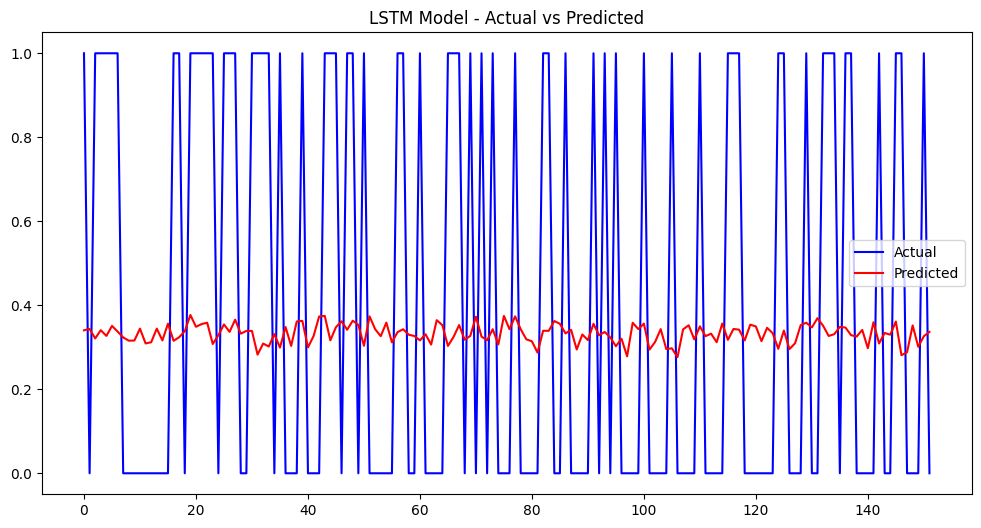

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv('/content/diabetes (4).csv')

# Display first few rows
print("Dataset Sample:\n", df.head())

# Check for missing values
if df.isnull().sum().sum() > 0:
    df = df.dropna()  # Remove rows with missing values
    print("Missing values found and removed.")

# Assume the last column is the target (Modify if needed)
target_column = df.columns[-1]

# Normalize feature columns
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df.drop(columns=[target_column]))

# Extract target variable (assuming a numerical regression task)
y = df[target_column].values
y = y.reshape(-1, 1)
y = MinMaxScaler().fit_transform(y)  # Normalize target variable

# Define function to create LSTM sequences
def create_sequences(data, target, time_steps=10):
    X, y_seq = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y_seq.append(target[i+time_steps])
    return np.array(X), np.array(y_seq)

# Define time steps (sequence length)
time_steps = 10
X, y_seq = create_sequences(data_scaled, y, time_steps)

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y_seq, test_size=0.2, random_state=42)

# Reshape X for LSTM input (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)  # Output layer
])

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Predict on test set
y_pred = model.predict(X_test)

# Inverse transform predictions and actual values
y_pred = MinMaxScaler().fit(y).inverse_transform(y_pred)
y_actual = MinMaxScaler().fit(y).inverse_transform(y_test)

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_actual, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.legend()
plt.title('LSTM Model - Actual vs Predicted')
plt.show()

# Save model
model.save('lstm_diabetes_model.h5')


gradient boosting machines by classification

In [ ]:
pip install numpy pandas scikit-learn matplotlib


Dataset Sample:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Enter 'classification' or 'regression': regression
Mean Squared Error: 0.17


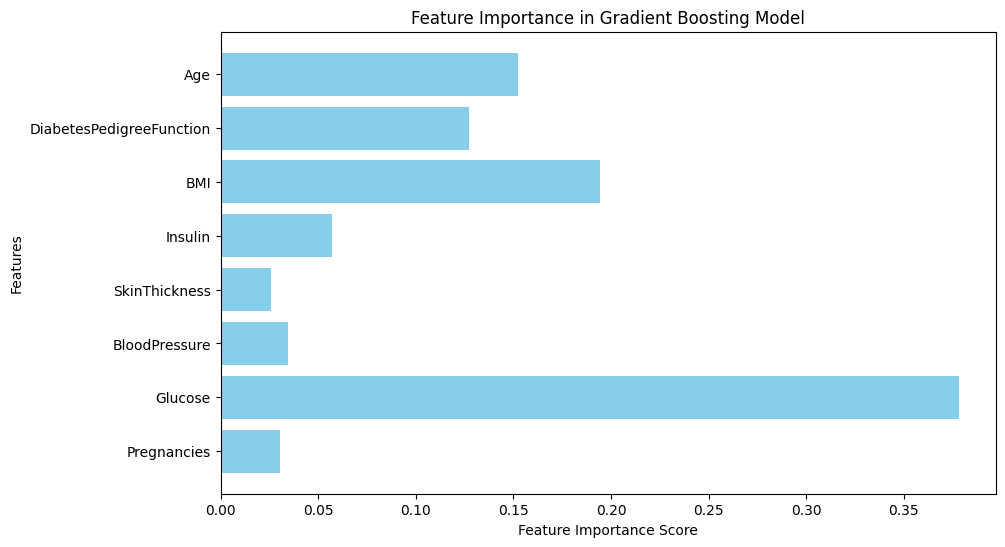

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error

# Load dataset
df = pd.read_csv('/content/diabetes (4).csv')

# Display first few rows
print("Dataset Sample:\n", df.head())

# Check for missing values and handle them
if df.isnull().sum().sum() > 0:
    df = df.dropna()  # Drop rows with missing values
    print("Missing values found and removed.")

# Assume the last column is the target variable (modify if needed)
target_column = df.columns[-1]

# Encode categorical target if necessary
if df[target_column].dtype == 'object':
    label_encoder = LabelEncoder()
    df[target_column] = label_encoder.fit_transform(df[target_column])

# Split features (X) and target variable (y)
X = df.drop(columns=[target_column])
y = df[target_column]

# Normalize features for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing datasets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Choose Classification or Regression
task = input("Enter 'classification' or 'regression': ").strip().lower()

if task == "classification":
    # Initialize Gradient Boosting Classifier
    model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

elif task == "regression":
    # Initialize Gradient Boosting Regressor
    model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate performance
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse:.2f}')

else:
    print("Invalid input. Please enter 'classification' or 'regression'.")
    exit()

# Feature importance visualization
plt.figure(figsize=(10, 6))
plt.barh(X.columns, model.feature_importances_, color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Gradient Boosting Model")
plt.show()


gradient boosting machines by regression

Dataset Sample:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Enter 'classification' or 'regression': classification
Accuracy: 0.75

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy               

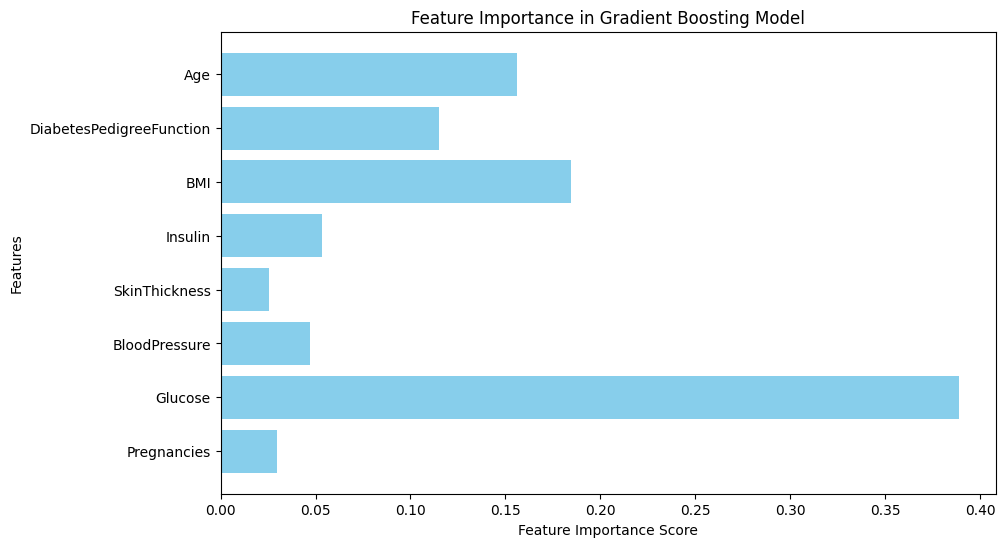

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error

# Load dataset
df = pd.read_csv('/content/diabetes (4).csv')

# Display first few rows
print("Dataset Sample:\n", df.head())

# Check for missing values and handle them
if df.isnull().sum().sum() > 0:
    df = df.dropna()  # Drop rows with missing values
    print("Missing values found and removed.")

# Assume the last column is the target variable (modify if needed)
target_column = df.columns[-1]

# Encode categorical target if necessary
if df[target_column].dtype == 'object':
    label_encoder = LabelEncoder()
    df[target_column] = label_encoder.fit_transform(df[target_column])

# Split features (X) and target variable (y)
X = df.drop(columns=[target_column])
y = df[target_column]

# Normalize features for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing datasets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Choose Classification or Regression
task = input("Enter 'classification' or 'regression': ").strip().lower()

if task == "classification":
    # Initialize Gradient Boosting Classifier
    model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

elif task == "regression":
    # Initialize Gradient Boosting Regressor
    model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate performance
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse:.2f}')

else:
    print("Invalid input. Please enter 'classification' or 'regression'.")
    exit()

# Feature importance visualization
plt.figure(figsize=(10, 6))
plt.barh(X.columns, model.feature_importances_, color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Gradient Boosting Model")
plt.show()


SYNTHETIC DATASET GENERATION

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from google.colab import files

# Load the real dataset (Upload manually in Colab)
uploaded = files.upload()
filename = list(uploaded.keys())[0]  # Get the uploaded filename dynamically
df = pd.read_csv(filename)


# Normalize features for better GAN training
data = df.values.astype(np.float32)
data[:, :-1] = (data[:, :-1] - data[:, :-1].mean(axis=0)) / data[:, :-1].std(axis=0)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define Generator class
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, output_dim),
        )

    def forward(self, z):
        return self.model(z)

# Define Discriminator class
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        return self.model(x)

latent_dim = 10  # Dimensionality of random noise input
gen = Generator(latent_dim, data.shape[1]).to(device)
disc = Discriminator(data.shape[1]).to(device)

# Loss and optimizers
criterion = nn.BCELoss()
optimizer_G = optim.Adam(gen.parameters(), lr=0.001)
optimizer_D = optim.Adam(disc.parameters(), lr=0.001)

real_data = torch.tensor(data).to(device)
num_epochs = 5000
batch_size = 64

# Training loop
for epoch in range(num_epochs):
    # Train Discriminator
    optimizer_D.zero_grad()
    real_labels = torch.ones(batch_size, 1).to(device)
    fake_labels = torch.zeros(batch_size, 1).to(device)

    idx = np.random.randint(0, data.shape[0], batch_size)
    real_batch = real_data[idx]

    z = torch.randn(batch_size, latent_dim).to(device)
    fake_batch = gen(z)

    real_loss = criterion(disc(real_batch), real_labels)
    fake_loss = criterion(disc(fake_batch.detach()), fake_labels)
    d_loss = real_loss + fake_loss
    d_loss.backward()
    optimizer_D.step()

    # Train Generator
    optimizer_G.zero_grad()
    g_loss = criterion(disc(fake_batch), real_labels)
    g_loss.backward()
    optimizer_G.step()

    if epoch % 1000 == 0:
        print(f"Epoch [{epoch}/{num_epochs}]  D Loss: {d_loss.item():.4f}  G Loss: {g_loss.item():.4f}")

# Generate synthetic dataset (3,000+ samples)
z = torch.randn(3500, latent_dim).to(device)
synthetic_data = gen(z).detach().cpu().numpy()

# Convert back to original scale
synthetic_data[:, :-1] = (synthetic_data[:, :-1] * df.iloc[:, :-1].std(axis=0).values) + df.iloc[:, :-1].mean(axis=0).values

# Convert to DataFrame
synthetic_df = pd.DataFrame(synthetic_data, columns=df.columns)

# Save and download
synthetic_file_path = "synthetic_diabetes.csv"
synthetic_df.to_csv(synthetic_file_path, index=False)
files.download(synthetic_file_path)

print("Synthetic dataset generated and downloaded!")


Saving diabetes (4).csv to diabetes (4) (1).csv
Epoch [0/5000]  D Loss: 1.4040  G Loss: 0.6662
Epoch [1000/5000]  D Loss: 1.0688  G Loss: 2.2143
Epoch [2000/5000]  D Loss: 1.0232  G Loss: 1.3808
Epoch [3000/5000]  D Loss: 1.4586  G Loss: 0.9926
Epoch [4000/5000]  D Loss: 1.2187  G Loss: 1.1158


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Synthetic dataset generated and downloaded!


ALGORITHMS IN SYNTHETIC DATASET

BAGGING

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = "/content/synthetic_diabetes (1).csv"
df = pd.read_csv(file_path)

# Convert Outcome to binary (0 or 1) using a threshold of 0.5
df["Outcome"] = (df["Outcome"] >= 0.5).astype(int)

# Split data into features and target
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Bagging Classifier with Decision Tree as the base estimator
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)

# Train the model
bagging_clf.fit(X_train, y_train)

# Make predictions
y_pred = bagging_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Bagging Classifier Accuracy: {accuracy:.4f}")


Bagging Classifier Accuracy: 0.9314


Predictions: [0 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1
 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0
 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0
 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1
 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 1
 1 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0
 0 1 1 0 1 1

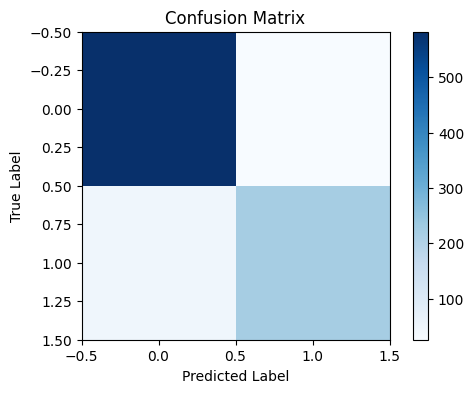

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
dataset = pd.read_csv("/content/synthetic_diabetes (1).csv")

# Convert Outcome to binary (0 or 1) using a threshold of 0.5
dataset["Outcome"] = (dataset["Outcome"] >= 0.5).astype(int)

# Split dataset into features and target
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train SVM classifier
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)
print("Predictions:", y_pred)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


boosting algorithm


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

# Load dataset
df = pd.read_csv("/content/synthetic_diabetes (1).csv")

# Convert 'Outcome' to binary (0 or 1) using a threshold of 0.5
df['Outcome'] = (df['Outcome'] >= 0.5).astype(int)  # Convert to binary


# Split into features and target
X = df.iloc[:, :-1]  # Select all columns except the last one
y = df.iloc[:, -1]   # Select the last column

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize AdaBoost with Decision Trees
adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),  # Fixed argument name
                              n_estimators=50, learning_rate=1.0, random_state=42)

# Train model
adaboost.fit(X_train, y_train)

# Make predictions
y_pred = adaboost.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print(report)


Accuracy: 0.9085714285714286
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       503
           1       0.87      0.80      0.83       197

    accuracy                           0.91       700
   macro avg       0.90      0.87      0.88       700
weighted avg       0.91      0.91      0.91       700



desicion tree

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data_path = "/content/synthetic_diabetes (1).csv"
df = pd.read_csv(data_path)

# Convert Outcome to binary (0 or 1) using a threshold of 0.5
df["Outcome"] = (df["Outcome"] >= 0.5).astype(int)

# Display first few rows to understand the structure
display(df.head())

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Define features and target (assuming the last column is the target)
X = df.iloc[:, :-1]  # All columns except the last one
y = df.iloc[:, -1]    # Last column as target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.144242,119.522700,80.68400,27.302584,3.395716,27.418037,0.808266,35.923744,1
1,2.799592,107.221200,68.47474,5.845612,23.904530,29.704136,0.435482,30.459457,0
2,3.319701,76.497900,81.54130,-3.109330,26.692083,16.765942,0.182964,32.645680,1
3,2.881592,79.026146,68.75046,0.383973,3.363067,23.543270,0.208078,29.018450,1
4,1.619907,98.607320,72.76307,12.826013,50.486244,22.164032,0.282013,24.230436,0


Missing values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       503
           1       0.83      0.83      0.83       197

    accuracy                           0.90       700
   macro avg       0.88      0.88      0.88       700
weighted avg       0.90      0.90      0.90       700



GNN

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import kneighbors_graph

# Load the dataset
data_path = "/content/synthetic_diabetes (1).csv"  # Update the path if necessary
df = pd.read_csv(data_path)

# Define features and target
X = df.iloc[:, :-1].values  # Feature matrix
y = df.iloc[:, -1].values   # Target labels

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create adjacency matrix using k-Nearest Neighbors
adj_matrix = kneighbors_graph(X, n_neighbors=5, mode='connectivity', include_self=True)
edge_index = torch.tensor(np.array(adj_matrix.nonzero()), dtype=torch.long)

# Convert data to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float)
y_tensor = torch.tensor(y, dtype=torch.long)

data = Data(x=X_tensor, edge_index=edge_index, y=y_tensor)

# Define Graph Neural Network (GNN) Model
class GNN(torch.nn.Module):
    def __init__(self, in_features, hidden_dim, out_features):
        super(GNN, self).__init__()
        self.conv1 = GCNConv(in_features, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, out_features)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Model setup
model = GNN(in_features=X.shape[1], hidden_dim=16, out_features=len(np.unique(y)))
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

# Train the model
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out, data.y)
    loss.backward()
    optimizer.step()
    return loss.item()

# Train for 200 epochs
for epoch in range(200):
    loss = train()
    if epoch % 20 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Evaluate the model
model.eval()
_, pred = model(data).max(dim=1)
accuracy = (pred == data.y).sum().item() / len(data.y)
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 0, Loss: 8.1952
Epoch 20, Loss: 3.7878
Epoch 40, Loss: 0.5291
Epoch 60, Loss: 0.2920
Epoch 80, Loss: 0.1784
Epoch 100, Loss: 0.1190
Epoch 120, Loss: 0.0915
Epoch 140, Loss: 0.0753
Epoch 160, Loss: 0.0651
Epoch 180, Loss: 0.0585
Test Accuracy: 0.9854


In [ ]:
!pip install torch-geometric torch-scatter torch-sparse torch-cluster torch-spline-conv -f https://data.pyg.org/whl/torch-2.0.0+cpu.html

import pandas as pd
import numpy as np
import torch
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import f1_score, precision_score, recall_score # Import evaluation metrics

# Load the dataset
data_path = "/content/synthetic_diabetes (1).csv"  # Update the path if necessary
df = pd.read_csv(data_path)

# Define features and target
X = df.iloc[:, :-1].values  # Feature matrix
y = df.iloc[:, -1].values   # Target labels

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create adjacency matrix using k-Nearest Neighbors
adj_matrix = kneighbors_graph(X, n_neighbors=5, mode='connectivity', include_self=True)
edge_index = torch.tensor(np.array(adj_matrix.nonzero()), dtype=torch.long)

# Convert data to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float)
y_tensor = torch.tensor(y, dtype=torch.long)

# Define the Data object
data = Data(x=X_tensor, edge_index=edge_index, y=y_tensor)

# Define Graph Neural Network (GNN) Model
class GNN(torch.nn.Module):
    def __init__(self, in_features, hidden_dim, out_features):
        super(GNN, self).__init__()
        self.conv1 = GCNConv(in_features, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, out_features)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Model setup
model = GNN(in_features=X.shape[1], hidden_dim=16, out_features=len(np.unique(y)))
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

# Train the model
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out, data.y)
    loss.backward()
    optimizer.step()
    return loss.item()

# Train for 200 epochs
for epoch in range(200):
    loss = train()
    if epoch % 20 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Evaluate the model
model.eval()
_, pred = model(data).max(dim=1)
accuracy = (pred == data.y).sum().item() / len(data.y)
print(f"Test Accuracy: {accuracy:.4f}")

# Convert predictions and true labels to NumPy arrays for evaluation metrics
y_true = data.y.cpu().numpy()
y_pred = pred.cpu().numpy()

# Calculate metrics
f1 = f1_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

# Print results
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Looking in links: https://data.pyg.org/whl/torch-2.0.0+cpu.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.0/494.0 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.9/750.9 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.1/208.1 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 26.4 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_scatter/_version_cpu.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:97: UserWarning: An issue occurred while importing 'torch-cluster'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_cluster/_version_cpu.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-cluster'. "
/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:113: UserWarning: An issue occurred while importing 'torch-spline-conv'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_spline_conv/_version_cpu.so: undefined symbol: _ZN3c1017RegisterOp

Epoch 0, Loss: 8.1378
Epoch 20, Loss: 3.7329
Epoch 40, Loss: 0.6021
Epoch 60, Loss: 0.3293
Epoch 80, Loss: 0.1967
Epoch 100, Loss: 0.1329
Epoch 120, Loss: 0.1034
Epoch 140, Loss: 0.0845
Epoch 160, Loss: 0.0713
Epoch 180, Loss: 0.0616
Test Accuracy: 0.9851
F1 Score: 0.6389
Precision: 0.8679
Recall: 0.5055


Tabesnet

In [ ]:
!pip install pytorch-tabnet
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pytorch_tabnet.tab_model import TabNetClassifier

# Load the dataset
data_path = "/content/synthetic_diabetes (1).csv"  # Update the path if necessary
df = pd.read_csv(data_path)

# Define features and target
X = df.iloc[:, :-1].values  # Feature matrix
y = df.iloc[:, -1].values   # Target labels

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Define TabNet model
clf = TabNetClassifier()

# Train the model
clf.fit(
    X_train=X_train,
    y_train=y_train,
    eval_set=[(X_test, y_test)],
    eval_name=["test"],
    eval_metric=["accuracy"],
    max_epochs=100,
    patience=10,
    batch_size=256,
    virtual_batch_size=128
)

# Evaluate the model
y_pred = clf.predict(X_test)
accuracy = (y_pred == y_test).sum() / len(y_test)
print(f"Test Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


ValueError: Unknown label type: (array([0.18417844, 0.07408405, 0.4248649 , ..., 0.14243793, 0.3712901 ,
       0.29984868], shape=(2800,)),)

In [ ]:
!pip install typeguard==2.13.3 inflect==6.0.2 tensorflow-addons --no-cache-dir




In [ ]:
pip install numpy pandas tensorflow scikit-learn matplotlib


LSTM

Dataset Sample:
    Pregnancies     Glucose  BloodPressure  SkinThickness    Insulin  \
0     1.144242  119.522700       80.68400      27.302584   3.395716   
1     2.799592  107.221200       68.47474       5.845612  23.904530   
2     3.319701   76.497900       81.54130      -3.109330  26.692083   
3     2.881592   79.026146       68.75046       0.383973   3.363067   
4     1.619907   98.607320       72.76307      12.826013  50.486244   

         BMI  DiabetesPedigreeFunction        Age   Outcome  
0  27.418037                  0.808266  35.923744  0.567482  
1  29.704136                  0.435482  30.459457  0.471420  
2  16.765942                  0.182964  32.645680  0.514876  
3  23.543270                  0.208078  29.018450  0.570275  
4  22.164032                  0.282013  24.230436  0.220422  


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.0276 - val_loss: 0.0197
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0214 - val_loss: 0.0202
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0196 - val_loss: 0.0195
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0210 - val_loss: 0.0195
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0202 - val_loss: 0.0199
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0200 - val_loss: 0.0202
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0199 - val_loss: 0.0194
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0201 - val_loss: 0.0196
Epoch 9/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0199 - val_loss: 0.0209
Epoch 10/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0207 - val_loss: 0.0195
Epoch 11/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0207 - val_loss: 0.0202
Epoch 12/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0207 - val_

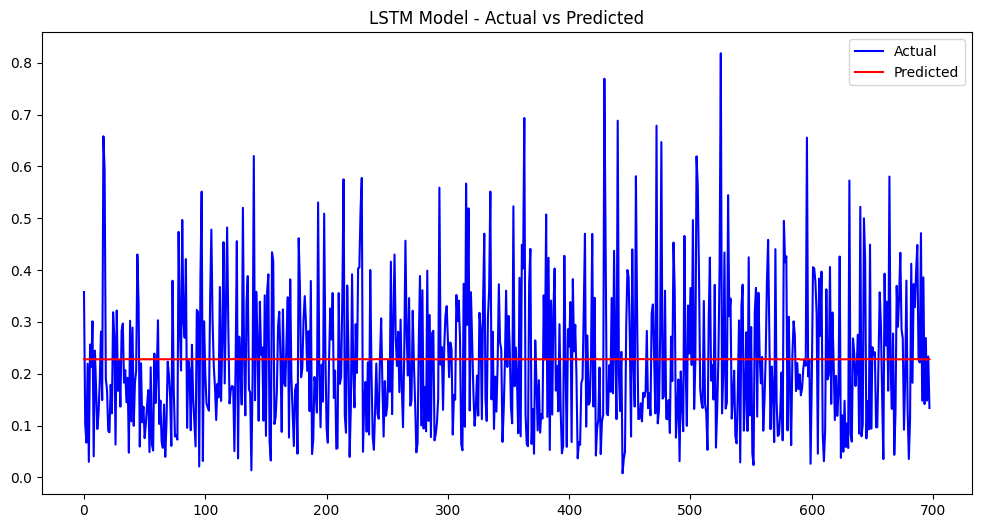

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("/content/synthetic_diabetes (1).csv")

# Display first few rows
print("Dataset Sample:\n", df.head())

# Check for missing values
if df.isnull().sum().sum() > 0:
    df = df.dropna()  # Remove rows with missing values
    print("Missing values found and removed.")

# Assume the last column is the target (Modify if needed)
target_column = df.columns[-1]

# Normalize feature columns
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df.drop(columns=[target_column]))

# Extract target variable (assuming a numerical regression task)
y = df[target_column].values
y = y.reshape(-1, 1)
y = MinMaxScaler().fit_transform(y)  # Normalize target variable

# Define function to create LSTM sequences
def create_sequences(data, target, time_steps=10):
    X, y_seq = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y_seq.append(target[i+time_steps])
    return np.array(X), np.array(y_seq)

# Define time steps (sequence length)
time_steps = 10
X, y_seq = create_sequences(data_scaled, y, time_steps)

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y_seq, test_size=0.2, random_state=42)

# Reshape X for LSTM input (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)  # Output layer
])

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Predict on test set
y_pred = model.predict(X_test)

# Inverse transform predictions and actual values
y_pred = MinMaxScaler().fit(y).inverse_transform(y_pred)
y_actual = MinMaxScaler().fit(y).inverse_transform(y_test)

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_actual, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.legend()
plt.title('LSTM Model - Actual vs Predicted')
plt.show()

# Save model
model.save('lstm_diabetes_model.h5')


gradient boosting machine by classification

In [ ]:
pip install numpy pandas scikit-learn matplotlib


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error

# Load dataset
df = pd.read_csv("/content/synthetic_diabetes (1).csv")

# Display first few rows
print("Dataset Sample:\n", df.head())

# Check for missing values and handle them
if df.isnull().sum().sum() > 0:
    df = df.dropna()  # Drop rows with missing values
    print("Missing values found and removed.")

# Assume the last column is the target variable (modify if needed)
target_column = df.columns[-1]

# Encode categorical target if necessary
if df[target_column].dtype == 'object':
    label_encoder = LabelEncoder()
    df[target_column] = label_encoder.fit_transform(df[target_column])

# Split features (X) and target variable (y)
X = df.drop(columns=[target_column])
y = df[target_column]

# Normalize features for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing datasets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Choose Classification or Regression
task = input("Enter 'classification' or 'regression': ").strip().lower()

if task == "classification":
    # Initialize Gradient Boosting Classifier
    model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

elif task == "regression":
    # Initialize Gradient Boosting Regressor
    model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate performance
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse:.2f}')

else:
    print("Invalid input. Please enter 'classification' or 'regression'.")
    exit()

# Feature importance visualization
plt.figure(figsize=(10, 6))
plt.barh(X.columns, model.feature_importances_, color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Gradient Boosting Model")
plt.show()


Dataset Sample:
    Pregnancies     Glucose  BloodPressure  SkinThickness    Insulin  \
0     1.144242  119.522700       80.68400      27.302584   3.395716   
1     2.799592  107.221200       68.47474       5.845612  23.904530   
2     3.319701   76.497900       81.54130      -3.109330  26.692083   
3     2.881592   79.026146       68.75046       0.383973   3.363067   
4     1.619907   98.607320       72.76307      12.826013  50.486244   

         BMI  DiabetesPedigreeFunction        Age   Outcome  
0  27.418037                  0.808266  35.923744  0.567482  
1  29.704136                  0.435482  30.459457  0.471420  
2  16.765942                  0.182964  32.645680  0.514876  
3  23.543270                  0.208078  29.018450  0.570275  
4  22.164032                  0.282013  24.230436  0.220422  


gradient boosting machine by regresionn

Dataset Sample:
    Pregnancies     Glucose  BloodPressure  SkinThickness    Insulin  \
0     1.144242  119.522700       80.68400      27.302584   3.395716   
1     2.799592  107.221200       68.47474       5.845612  23.904530   
2     3.319701   76.497900       81.54130      -3.109330  26.692083   
3     2.881592   79.026146       68.75046       0.383973   3.363067   
4     1.619907   98.607320       72.76307      12.826013  50.486244   

         BMI  DiabetesPedigreeFunction        Age   Outcome  
0  27.418037                  0.808266  35.923744  0.567482  
1  29.704136                  0.435482  30.459457  0.471420  
2  16.765942                  0.182964  32.645680  0.514876  
3  23.543270                  0.208078  29.018450  0.570275  
4  22.164032                  0.282013  24.230436  0.220422  
Enter 'classification' or 'regression': regression
Mean Squared Error: 0.00


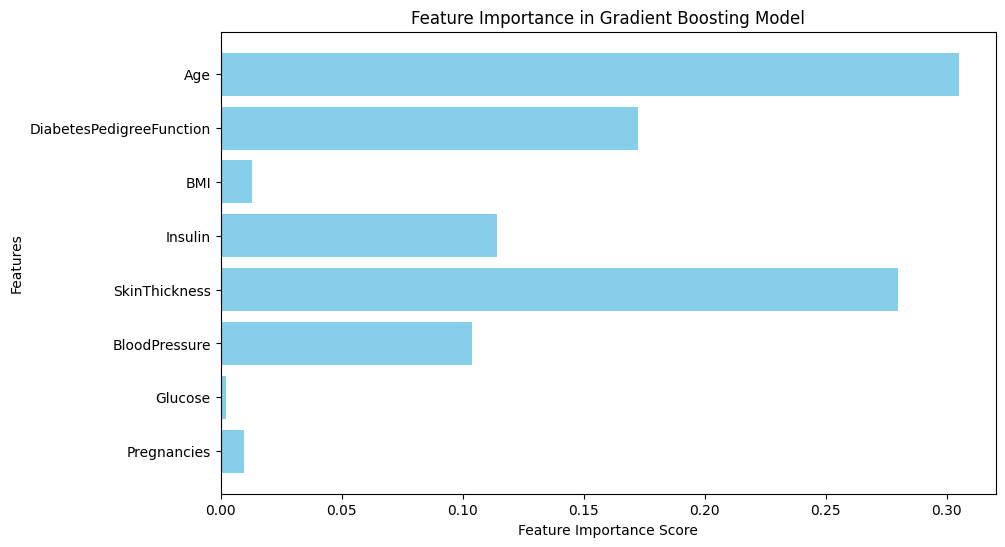

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error

# Load dataset
df = pd.read_csv('/content/synthetic_diabetes (1).csv')

# Display first few rows
print("Dataset Sample:\n", df.head())

# Check for missing values and handle them
if df.isnull().sum().sum() > 0:
    df = df.dropna()  # Drop rows with missing values
    print("Missing values found and removed.")

# Assume the last column is the target variable (modify if needed)
target_column = df.columns[-1]

# Encode categorical target if necessary
if df[target_column].dtype == 'object':
    label_encoder = LabelEncoder()
    df[target_column] = label_encoder.fit_transform(df[target_column])

# Split features (X) and target variable (y)
X = df.drop(columns=[target_column])
y = df[target_column]

# Normalize features for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing datasets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Choose Classification or Regression
task = input("Enter 'classification' or 'regression': ").strip().lower()

if task == "classification":
    # Initialize Gradient Boosting Classifier
    model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

elif task == "regression":
    # Initialize Gradient Boosting Regressor
    model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate performance
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse:.2f}')

else:
    print("Invalid input. Please enter 'classification' or 'regression'.")
    exit()

# Feature importance visualization
plt.figure(figsize=(10, 6))
plt.barh(X.columns, model.feature_importances_, color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Gradient Boosting Model")
plt.show()


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


R² Score: 0.9246510090228468


catboost by clasification

In [ ]:
!pip install --upgrade --force-reinstall numpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 90.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.


catboost by regresion

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error

# Load dataset
file_path = "/content/synthetic_diabetes (1).csv"  # Adjust the path if needed
df = pd.read_csv(file_path)

# Display first few rows
print("Dataset Sample:\n", df.head())

# Check for missing values and handle them
if df.isnull().sum().sum() > 0:
    df = df.dropna()  # Drop rows with missing values
    print("Missing values found and removed.")

# Assume the last column is the target variable (modify if needed)
target_column = df.columns[-1]

# Identify categorical columns
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Encode categorical target variable if necessary
if df[target_column].dtype == 'object':
    label_encoder = LabelEncoder()
    df[target_column] = label_encoder.fit_transform(df[target_column])

# Split features (X) and target variable (y)
X = df.drop(columns=[target_column])
y = df[target_column]

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing datasets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Choose Classification or Regression
task = input("Enter 'classification' or 'regression': ").strip().lower()

if task == "classification":
    # Initialize CatBoost Classifier
    model = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, verbose=0, cat_features=categorical_features)

    # Train the model
    model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=50, early_stopping_rounds=50)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

elif task == "regression":
    # Initialize CatBoost Regressor
    model = CatBoostRegressor(iterations=500, learning_rate=0.1, depth=6, verbose=0, cat_features=categorical_features)

    # Train the model
    model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=50, early_stopping_rounds=50)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate performance
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse:.2f}')

else:
    print("Invalid input. Please enter 'classification' or 'regression'.")
    exit()

# Feature importance visualization
plt.figure(figsize=(10, 6))
plt.barh(X.columns, model.get_feature_importance(), color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in CatBoost Model")
plt.show()


ModuleNotFoundError: No module named 'catboost'